In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Prompt.csv")
curie_df = pd.read_csv("curie_Prompt.csv")
davinci_df = pd.read_csv("davinci_Prompt.csv")
turbo_df = pd.read_csv("turbo_Prompt.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'

# Rename the 'Mean F1 Score', 'Mean Rouge1', etc. columns for consistency
ada_df = ada_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

curie_df = curie_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

davinci_df = davinci_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

turbo_df = turbo_df.rename(columns={"Generated_Texts": "Generated_Texts",
                                "F1_Score": "F1_Score",
                                "Rouge1": "Rouge1",
                                "Rouge2": "Rouge2",
                                "RougeL": "RougeL",
                                "Length": "Length",
                                "Vec2": "Vec2"})

# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model','Generated_Texts', 'F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_Prompt.csv", index=False)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (6) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers l

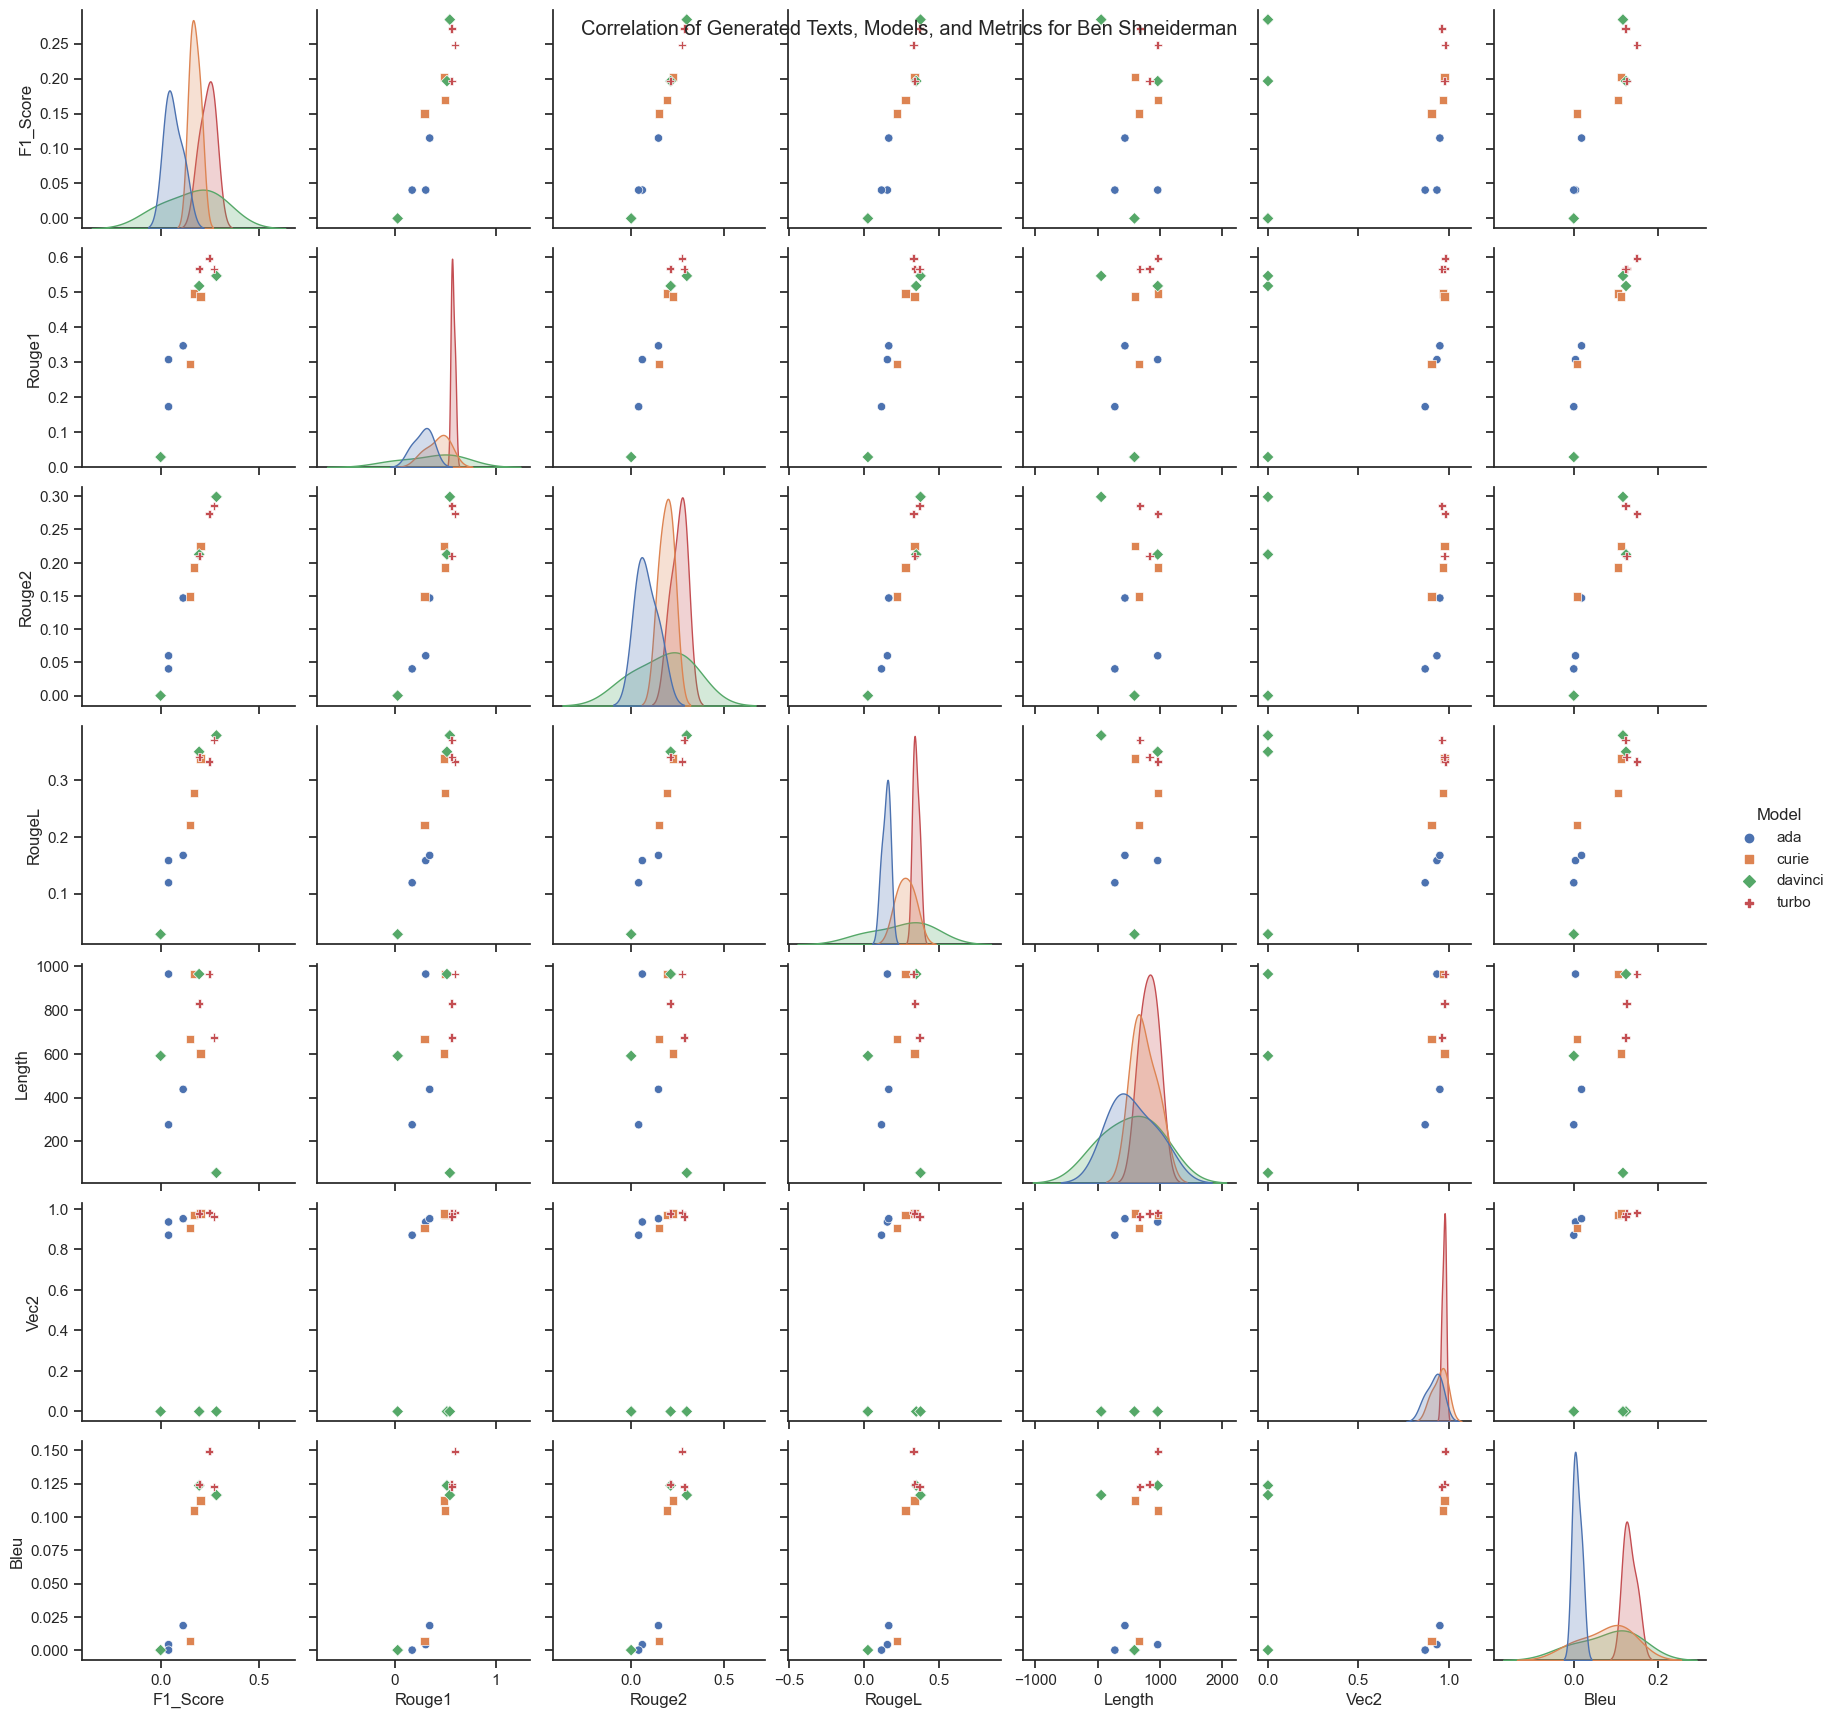

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the CSV data
df = pd.read_csv('combined_Prompt.csv')

# Filter data for the "Ben Shneiderman" name
ben_df = df[df['Name'] == 'Ben Shneiderman']

# Define the metrics you want to visualize
metrics = ['F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']

# Create a scatter plot matrix
sns.set(style='ticks')
sns.pairplot(ben_df, vars=metrics, hue='Model', markers=["o", "s", "D", "P", "X", "H"])

# Set the title
plt.suptitle("Correlation of Generated Texts, Models, and Metrics for Ben Shneiderman")

# Display the plot
plt.show()


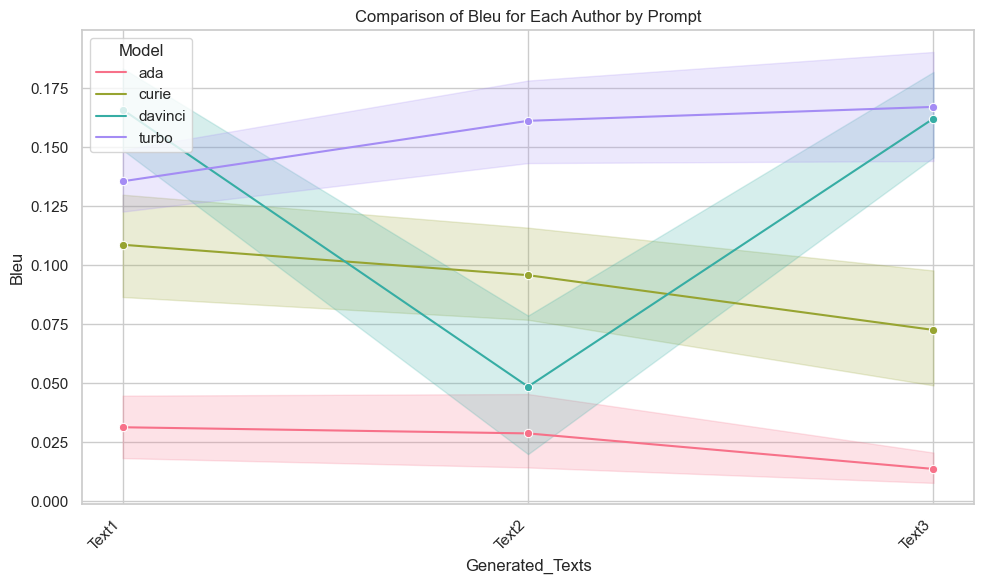

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_Prompt.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Bleu'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create the line plot with markers using the custom palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Generated_Texts', y=selected_metric, hue='Model', marker='o', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title(f'Comparison of {selected_metric} for Each Author by Prompt')
plt.ylabel(selected_metric)
plt.xlabel('Generated_Texts')
plt.legend(title='Model', loc='upper left')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

data = pd.read_csv('combined_Prompt.csv')

df = pd.DataFrame(data)

# Group the DataFrame by 'Model' and each text column, and calculate the mean length for each group
mean_length1 = df.groupby(['Model', 'Generated_Texts'])['Length'].mean()
mean_length2 = df.groupby(['Generated_Texts', 'Model'])['Length'].mean()

mean_length1.to_csv('mean_length1_results.csv', index=False)
mean_length2.to_csv('mean_length2_results.csv', index=False)


# Print the result
print(mean_length1)
print(mean_length2)



Model    Generated_Texts
ada      Text1              669.80
         Text2              345.30
         Text3              344.05
curie    Text1              669.80
         Text2              677.10
         Text3              673.60
davinci  Text1              669.80
         Text2              580.10
         Text3              232.30
turbo    Text1              669.80
         Text2              938.85
         Text3              629.40
Name: Length, dtype: float64
Generated_Texts  Model  
Text1            ada        669.80
                 curie      669.80
                 davinci    669.80
                 turbo      669.80
Text2            ada        345.30
                 curie      677.10
                 davinci    580.10
                 turbo      938.85
Text3            ada        344.05
                 curie      673.60
                 davinci    232.30
                 turbo      629.40
Name: Length, dtype: float64
